In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib.patches import Rectangle
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
file_path='2025_0001_0037_Detailed_kp.xlsx'
file_path2='2025_0038_0074_Detailed_kp.xlsx'


In [42]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the puit dictionary
puit_dict = {
    'puit1': ['2025-0001', '2025-0016', '2025-0030', '2025-0044', '2025-0059'],
    'puit2': ['2025-0002', '2025-0017', '2025-0031', '2025-0045', '2025-0060'],
    'puit3': ['2025-0003', '2025-0018', '2025-0032', '2025-0046', '2025-0061'],
    'puit4': ['2025-0004', '2025-0019', '2025-0033', '2025-0047', '2025-0062'],
    'puit5': ['2025-0005', '2025-0020', '2025-0034', '2025-0049', '2025-0063'],
    'puit6': ['2025-0006', '2025-0021', '2025-0035', '2025-0050', '2025-0064'],
    'puit7': ['2025-0007', '2025-0022', '2025-0036', '2025-0051', '2025-0065'],
    'puit8': ['2025-0008', '2025-0023', '2025-0037', '2025-0052', '2025-0066'],
    'puit9': ['2025-0009', '2025-0025', '2025-0038', '2025-0053', '2025-0067'],
    'puit10': ['2025-0010', '2025-0026', '2025-0039', '2025-0054', '2025-0068'],
    'puit11': ['2025-0011', '2025-0027', '2025-0041', '2025-0055', '2025-0069'],
    'puit12': ['2025-0012', '2025-0028', '2025-0042', '2025-0056', '2025-0070'],
    'puit13': ['2025-0029', '2025-0043', '2025-0057', '2025-0071'],
    'blank':['2025-0015'],
    'enzyme':['2025-0058','2025-0074']
}
display_names = [0,7,14,21,28]

# Dropdown widget
# === Dropdown for Puit
puit_dropdown = widgets.Dropdown(
    options=list(puit_dict.keys()),
    description="Choisir un puit:",
    style={'description_width': 'initial'}
)

# === Output placeholder
output = widgets.Output()

# === Callback
def on_puit_change(change):
    with output:
        clear_output()
        selected_puit = change["new"]
        sheet_list = puit_dict[selected_puit]

        # Load and display data, plots etc.
        compiled_dfs = []
        for name, day in zip(sheet_list, display_names):
            try:
                df = pd.read_excel(file_path, sheet_name=name, skiprows=2)
                df["Day"] = day
                compiled_dfs.append(df)
            except:
                continue

        if compiled_dfs:
            df_all = pd.concat(compiled_dfs, ignore_index=True)
            # === Your analysis or plot
            fig, ax = plt.subplots()
            df_all.groupby("Day")["Total Abund"].sum().plot(ax=ax, marker='o')
            ax.set_title(f"Total Abund par jour pour {selected_puit}")
            plt.show()
        else:
            print("Aucune donnée chargée.")

# === Link dropdown
puit_dropdown.observe(on_puit_change, names='value')

# === Display in Voilà
display(puit_dropdown, output)

Dropdown(description='Choisir un puit:', options=('puit1', 'puit2', 'puit3', 'puit4', 'puit5', 'puit6', 'puit7…

Output()

Compiled data

In [43]:
puit = puit_dropdown.value
sheet_list = puit_dict[puit]

compiled_dfs = []

for sheet_name, day_label in zip(sheet_list, display_names):
    try:
        print(f"Processing sheet: {sheet_name}")
        df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=2)
    except ValueError:
        try:
            df = pd.read_excel(file_path2, sheet_name=sheet_name, skiprows=2)
        except ValueError:
            print(f"Sheet {sheet_name} not found in either file.")
            continue

    df["Day"] = day_label  # <-- Add the day label
    compiled_dfs.append(df)



Processing sheet: 2025-0001
Processing sheet: 2025-0016
Processing sheet: 2025-0030
Processing sheet: 2025-0044
Processing sheet: 2025-0059


Formula

In [44]:
combined_df=pd.concat(compiled_dfs,ignore_index=True)

unique_formulas=combined_df["Formula"].dropna().unique()

formulas_per_day=combined_df.groupby("Day")["Formula"].apply(set)
common_formulas=set.intersection(*formulas_per_day)

print("Formulas in all days:",common_formulas)

Formulas in all days: {'C14H28O2', 'C12H20O2', 'C18H36O2', 'C11H20O3', 'C9H16O4', 'C9H16O3', 'C10H18O2', 'C9H16O2', 'C10H18O3', 'C10H16O2', 'C14H24O4', 'C13H20O2', 'C9H18O2', 'C10H16O3', 'C11H16O4', 'C9H10O3S', 'C11H18O2', 'C15H24O2', 'C8H8O3S', 'C14H26O3', 'C13H22O3', 'C10H14O4', 'C12H18O4', 'C10H20O2', 'C8H10N2', 'C14H22O4', 'C15H24O3', 'C13H20O3', 'C10H16O4', 'C14H10O3', 'C14H8O3', 'C12H18O3', 'C16H32O2', 'C12H20O4', 'C11H16O3', 'C15H22O3', 'C18H34O2', 'C9H14O4', 'C13H20O4', 'C15H26O3', 'C13H22O4', 'C12H18O2', 'C11H20O2', 'C11H18O3', 'C9H18O3', 'C14H22O3', 'C12H22O3', 'C14H24O3', 'C13H24O3', 'C15H22O4', 'C11H18O4', 'C10H18O4', 'C12H24O2', 'C12H20O3', 'C14H24O2', 'C13H22O2'}


TRENDS

In [45]:
trend_list=[]

for i, formula_to_track in enumerate(common_formulas):

    trend=combined_df[combined_df["Formula"]==formula_to_track]
    pivot=trend.pivot_table(index="Day",values="Total Abund")
    pivot.columns=[formula_to_track]
    trend_list.append(pivot)

    #print(pivot)
    #pivot.plot(title=f"Trend for {formula_to_track}", marker='o', figsize=(8, 4),ylabel="Total Abundance")

Summary

In [46]:
# Combine all into one trend DataFrame
df_trends = pd.concat(trend_list, axis=1).fillna(0)
df_trends.index = df_trends.index.astype(int)  # convert day index to int
df_trends = df_trends.sort_index()             # sort day index numerically (0,7,14...)

# === Step 2: Calculate fingerprinting metrics ===
summary = pd.DataFrame(index=df_trends.columns)

summary["Day0"] = df_trends.loc[0]
summary["Day28"] = df_trends.iloc[-1]
summary["FoldChange_28vs0"] = (summary["Day28"] / summary["Day0"]).replace([float("inf"), -float("inf")], None)
summary["AUC"] = df_trends.sum()
summary["PeakDay"] = df_trends.idxmax()
summary["MinDay"] = df_trends.idxmin()

# === Step 3: Behavior classification ===
def classify(row):
    if row["FoldChange_28vs0"] > 2:
        return "Growing"
    elif row["FoldChange_28vs0"] < 0.5:
        return "Decreasing"
    elif row["PeakDay"] in [7, 14]:
        return "Transient"
    else:
        return "Stable"

summary["Behavior"] = summary.apply(classify, axis=1)

# === Step 4: Print summary to console ===
print("\n=== Temporal Fingerprinting Summary (Top 20 by AUC) ===",{puit})
print(summary.sort_values("AUC", ascending=False).head(20).round(2).to_string())


=== Temporal Fingerprinting Summary (Top 20 by AUC) === {'puit1'}
              Day0     Day28  FoldChange_28vs0        AUC  PeakDay  MinDay    Behavior
C16H32O2  41373.78  73649.09              1.78  346627.36       21       0      Stable
C18H36O2  11515.07  42537.49              3.69  144220.86       28       0     Growing
C13H20O4  12302.82   9906.13              0.81  137660.07       14      28   Transient
C14H22O4   6462.14  10309.90              1.60  134055.93       14       0   Transient
C11H18O4  20032.11   8425.77              0.42  127638.28       14      28  Decreasing
C10H16O4  30798.91   8733.56              0.28  121723.48       14      28  Decreasing
C8H8O3S     634.75   3090.82              4.87  111622.88       14       0     Growing
C9H18O2   32521.76  21104.31              0.65  110133.88       21       7      Stable
C12H18O4  12424.99   5558.31              0.45   91446.65       14      28  Decreasing
C12H20O4   7929.79   6431.42              0.81   83901.44      

In [47]:
metadata_cols = ["Formula", "Class", "DBE", "#C", "#H", "#N", "#O", "#S", "Z Number", "H/C", "O/C", "S/C"]
formula_metadata = combined_df[metadata_cols].drop_duplicates(subset="Formula").set_index("Formula")

# Join to summary
summary_full = summary.join(formula_metadata, how="left")

# Print preview
print("\n=== Enriched Summary Preview ===")
print(summary_full.round(2).to_string())


=== Enriched Summary Preview ===
              Day0     Day28  FoldChange_28vs0        AUC  PeakDay  MinDay    Behavior Class   DBE  #C  #H  #N  #O  #S  Z Number   H/C   O/C   S/C
C14H28O2   3059.53   6804.28              2.22   25618.97       28       0     Growing    O2   1.5  14  28   0   2   0         0  2.00  0.14  0.00
C12H20O2  11129.13  10294.26              0.92   55699.09       14      21   Transient    O2   3.5  12  20   0   2   0        -4  1.67  0.17  0.00
C18H36O2  11515.07  42537.49              3.69  144220.86       28       0     Growing    O2   1.5  18  36   0   2   0         0  2.00  0.11  0.00
C11H20O3  10218.31   6700.43              0.66   53643.22       14      28   Transient    O3   2.5  11  20   0   3   0        -2  1.82  0.27  0.00
C9H16O4    5078.46   3715.25              0.73   24450.95        7      21   Transient    O4   2.5   9  16   0   4   0        -2  1.78  0.44  0.00
C9H16O3    5888.57   6234.08              1.06   42047.00       14       0   Transie

Ven Krevelen 

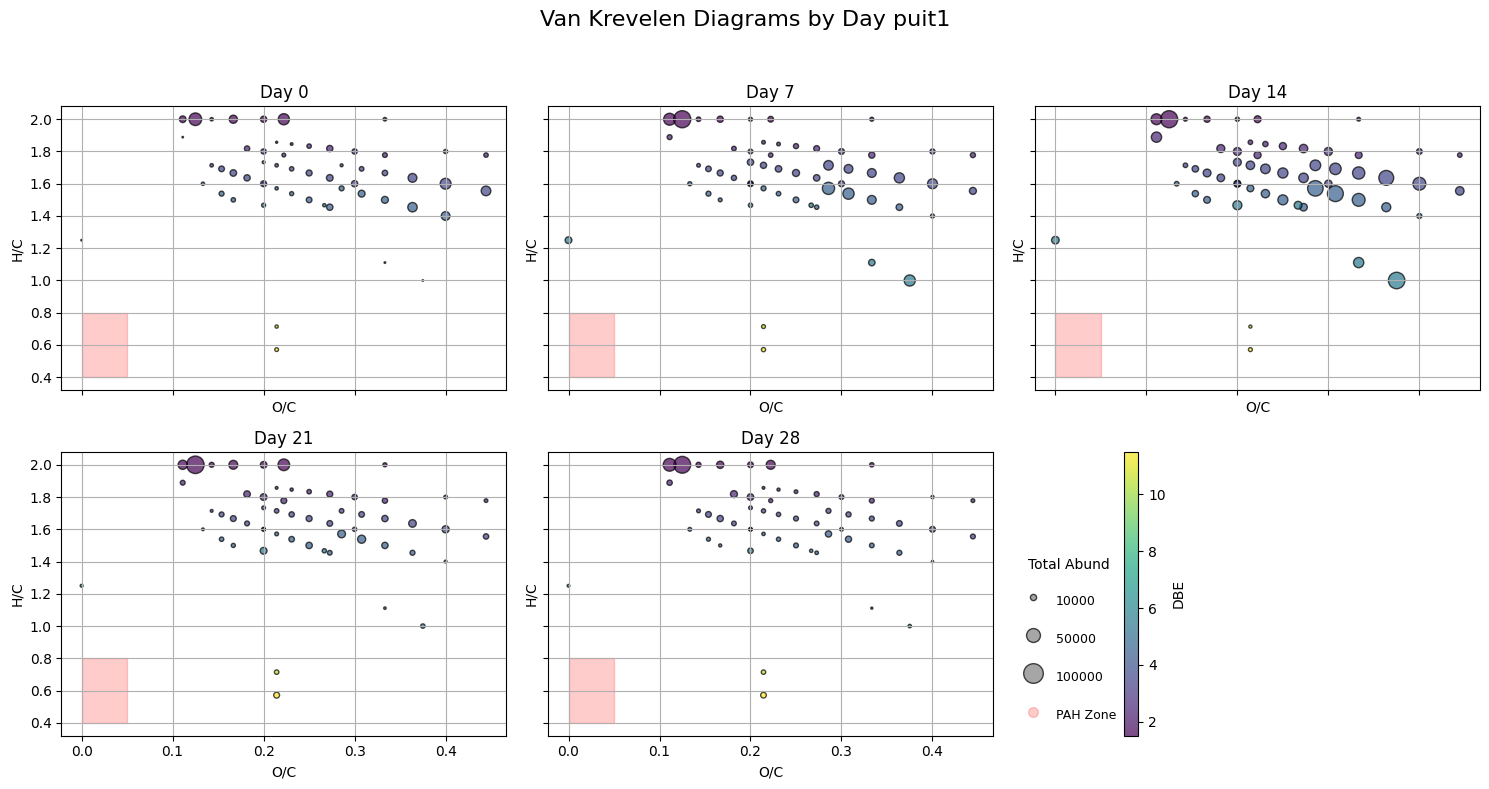

In [48]:
# === Prepare data ===
abund_by_day = combined_df.groupby(["Formula", "Day"])["Total Abund"].sum().reset_index()
vk_per_day = abund_by_day.merge(summary_full, left_on="Formula", right_index=True)
vk_per_day = vk_per_day.dropna(subset=["H/C", "O/C"])
vk_per_day["Day"] = vk_per_day["Day"].astype(int)
vk_per_day = vk_per_day.sort_values("Day")

# === Setup subplots ===
unique_days = sorted(vk_per_day["Day"].unique())
n_days = len(unique_days)
cols = 3
rows = int(np.ceil((n_days + 1) / cols))  # +1 slot for colorbar + legend

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharex=True, sharey=True)
axes = axes.flatten()

# === Plot each day's VK ===
for i, day in enumerate(unique_days):
    ax = axes[i]
    day_df = vk_per_day[vk_per_day["Day"] == day]

    # === Add PAH zone ===
    pah_zone = Rectangle(
        (0.0, 0.4),   # (O/C min, H/C min)
        0.05,         # O/C width
        0.4,          # H/C height
        linewidth=1,
        edgecolor='red',
        facecolor='red',
        alpha=0.2,
        label='PAH Zone' if i == 0 else None
    )
    ax.add_patch(pah_zone)

    scatter = ax.scatter(
        day_df["O/C"],
        day_df["H/C"],
        c=day_df["DBE"],
        cmap="viridis",
        s=day_df["Total Abund"] / 500,  # scale size
        alpha=0.7,
        edgecolors='k'
    )

    ax.set_title(f"Day {day}")
    ax.set_xlabel("O/C")
    ax.set_ylabel("H/C")
    ax.grid(True)

# === Colorbar in next unused subplot ===
cbar_ax = axes[len(unique_days)]
cbar_ax.axis("off")
cb = fig.colorbar(scatter, ax=cbar_ax, orientation="vertical", fraction=0.8)
cb.set_label("DBE")

# === Size legend (in same unused subplot) ===
sizes = [10000, 50000, 100000]  # Abundance values
for j, size in enumerate(sizes):
    cbar_ax.scatter([], [], s=size / 500, label=f"{size}", color='gray', edgecolor='k', alpha=0.7)

cbar_ax.legend(
    title="Total Abund",
    loc="lower center",
    frameon=False,
    fontsize=9,
    title_fontsize=10,
    handleheight=2,
    labelspacing=1.5
)

# Add PAH legend item (only once)
cbar_ax.scatter([], [], s=50, color='red', alpha=0.2, label="PAH Zone", edgecolors='red')
cbar_ax.legend(
    title="Total Abund",
    loc="lower center",
    frameon=False,
    fontsize=9,
    title_fontsize=10,
    handleheight=2,
    labelspacing=1.5
)

# === Hide extra unused axes ===
for j in range(len(unique_days) + 1, len(axes)):
    fig.delaxes(axes[j])

# === Final layout ===
fig.suptitle(f"Van Krevelen Diagrams by Day {puit}", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave room for title
plt.show()

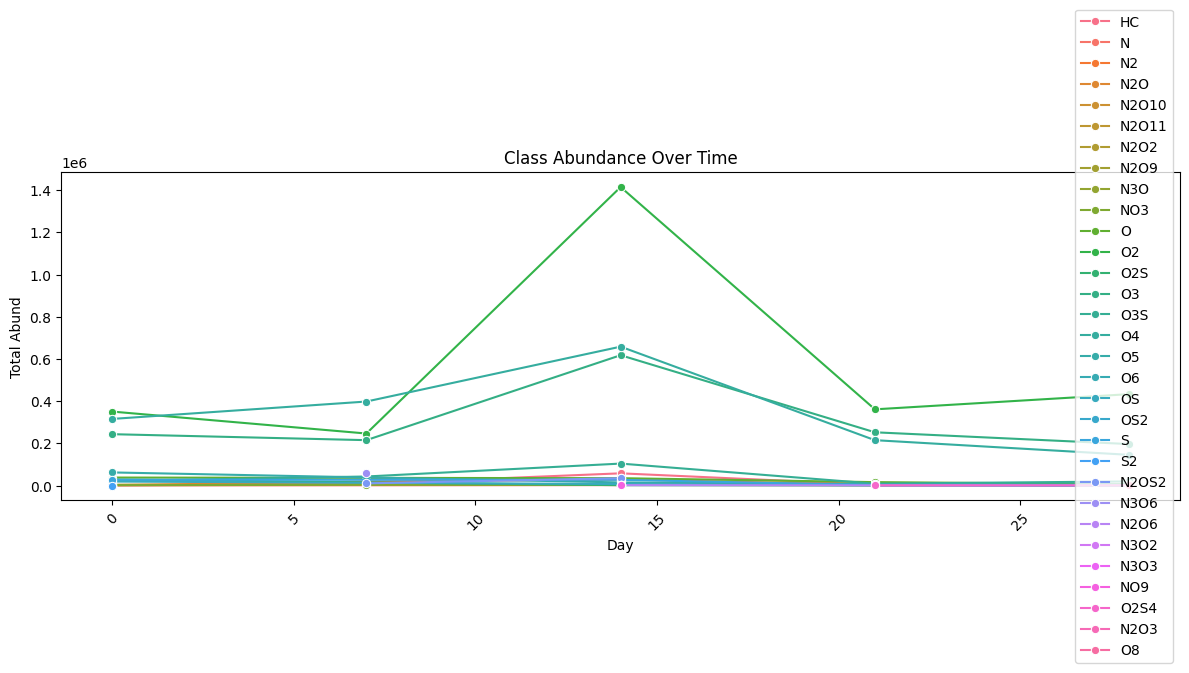

In [49]:
agg = combined_df.groupby(["Day", "Class"])["Total Abund"].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=agg, x="Day", y="Total Abund", hue="Class", marker="o")
plt.title("Class Abundance Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='right')
plt.show()

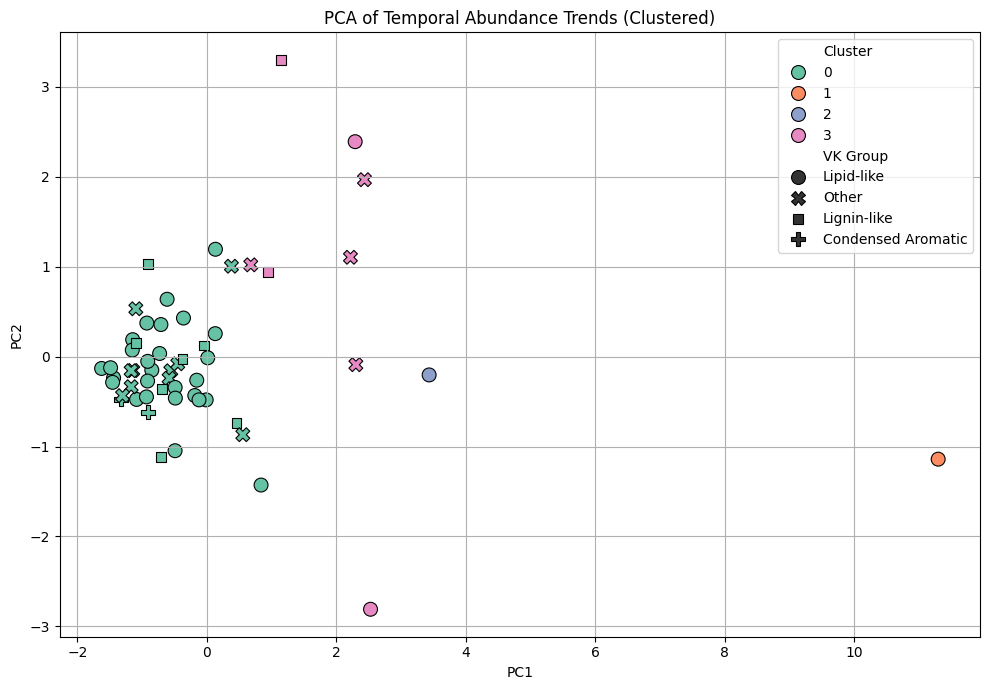


Cluster Summary:
               AUC  FoldChange_28vs0   DBE
Cluster                                   
0         40994.84              1.35  3.78
1        346627.36              1.78  1.50
2        144220.86              3.69  1.50
3        114772.83              1.24  3.88


In [50]:
# === 1. Van Krevelen zone classification ===
def assign_van_krevelen_group(row):
    h_c, o_c = row["H/C"], row["O/C"]
    if h_c > 1.5 and o_c < 0.3:
        return "Lipid-like"
    elif h_c > 1.5 and o_c > 0.6:
        return "Carbohydrate-like"
    elif 1.0 <= h_c <= 1.5 and 0.2 <= o_c <= 0.6:
        return "Lignin-like"
    elif h_c < 1.0 and o_c < 0.3:
        return "Condensed Aromatic"
    elif o_c > 0.6:
        return "Tannin-like"
    else:
        return "Other"

summary_full["VK Group"] = summary_full.apply(assign_van_krevelen_group, axis=1)

# === 2. Prepare abundance matrix for PCA ===
# df_trends: index=Day, columns=Formulas
X = df_trends.T.values  # Formulas x Timepoints
X_scaled = StandardScaler().fit_transform(X)  # normalize

# === 3. PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA dataframe
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=df_trends.columns)
pca_df["VK Group"] = summary_full["VK Group"]
pca_df["Behavior"] = summary_full["Behavior"]

# === 4. KMeans clustering (optional: change n_clusters) ===
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
pca_df["Cluster"] = kmeans.fit_predict(X_scaled)

# === 5. Plot PCA by cluster ===
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set2", style="VK Group", s=100, edgecolor="k")
plt.title("PCA of Temporal Abundance Trends (Clustered)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. Optional: cluster summary ===
cluster_summary = summary_full.join(pca_df["Cluster"]).groupby("Cluster")[["AUC", "FoldChange_28vs0", "DBE"]].mean()
print("\nCluster Summary:")
print(cluster_summary.round(2))